In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from pedalboard.pedalboard import load_plugin
from tqdm import tqdm

from src.dataset.paired_audio_dataset import PairedAudioDataset
from src.wrappers.dafx_wrapper import DAFXWrapper
from src.wrappers.null_dafx_wrapper import NullDAFXWrapper

In [2]:
DAFX_FILE = "/home/kieran/Level5ProjectAudioVAE/src/dafx/mda.vst3"
DAFX_NAME = "mda RingMod"
SAMPLE_RATE = 24_000
AUDIO_DIR = "/home/kieran/Level5ProjectAudioVAE/src/audio"
DATASETS = ["vctk_24000", "musdb_24000"]
NUM_EXAMPLES = 5

In [3]:
if DAFX_NAME.lower() == "clean":
    dafx = NullDAFXWrapper()
else:
    dafx = load_plugin(DAFX_FILE, plugin_name=DAFX_NAME)
    dafx = DAFXWrapper(dafx=dafx, sample_rate=SAMPLE_RATE)

In [4]:
dataset = PairedAudioDataset(
    dafx=dafx,
    audio_dir=AUDIO_DIR,
    subset="train",
    input_dirs=DATASETS,
    num_examples_per_epoch=NUM_EXAMPLES,
    augmentations={},
    effect_input=False,
    effect_output=True,
    dummy_setting=False
)

loader= torch.utils.data.DataLoader(
    dataset,
    num_workers=4,
    batch_size=1,
    timeout=6000,
)

100%|████████████████████████████████████████| 88/88 [00:00<00:00, 41106.89it/s]


Loaded 88 files for train = 66.89 hours.


In [5]:
x, y = next(iter(loader))

In [6]:
from IPython.display import Audio

In [7]:
print(x)

tensor([[[-0.0000e+00, -3.6311e-08, -7.2623e-08,  ...,  4.8839e-06,
           2.1696e-06,  0.0000e+00]]])


In [8]:
print(y)

tensor([[[ 0.0000e+00, -4.9253e-08,  6.2915e-08,  ..., -4.6038e-06,
           6.4559e-07,  1.0844e-07]]])


In [9]:
Audio(x.squeeze().numpy(), rate=SAMPLE_RATE)

In [10]:
Audio(y.squeeze().numpy(), rate=SAMPLE_RATE)

In [13]:
# means = []
# stds = []
#
# for batch in tqdm(loader):
#     x = batch
#     means.append(x.mean().item())
#     stds.append(x.std().item())

In [14]:
# np.array(means).mean()

In [15]:
# np.array(stds).mean()

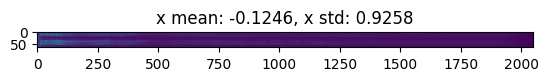

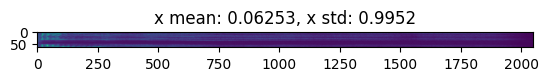

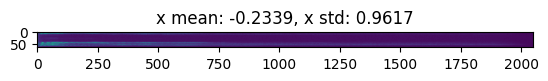

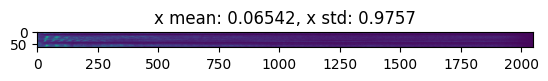

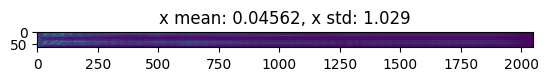

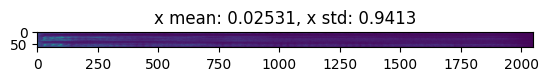

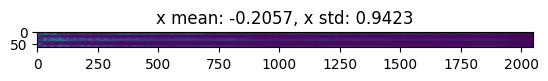

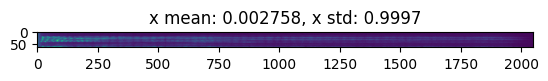

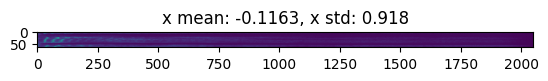

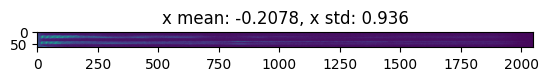

In [16]:
for batch in loader:
    x = batch
    plt.imshow(x.squeeze().numpy())
    plt.title(f"x mean: {x.mean():.4}, x std: {x.std():.4}")
    plt.show()